# Baseball Statistics: Hall of Fame

Baseball is a game full of statistics, and most of those statistics have been consistently and carefully tracked going back to the late 1800s. That makes professional baseball a playground for data analysts. Here I look at interesting correlations between players, their stats, and their salaries.

**Data Source:** [Lahman's Baseball Database](http://www.seanlahman.com/baseball-archive/statistics/). The data set I used was through the 2018 season.

Copyright © 2019 Ken Norton (ken@kennethnorton.com)

In [17]:
%run ./1_Data_Preparation.ipynb
plt.style.use(['default', 'fivethirtyeight', 'seaborn-poster'])

```
playerID       Player ID code
yearID         Year of ballot
votedBy        Method by which player was voted upon
ballots        Total ballots cast in that year
needed         Number of votes needed for selection in that year
votes          Total votes received
inducted       Whether player was inducted by that vote or not (Y or N)
category       Category in which candidate was honored
needed_note    Explanation of qualifiers for special elections
```

In [18]:
hof.describe()

,yearID,ballots,needed,votes
count,4191.000000,3994.000000,3837.000000,3994.000000
mean,1969.712956,322.574862,245.397707,51.934402
std,23.555073,125.265128,94.325990,86.137219
min,1936.000000,78.000000,59.000000,0.000000
25%,1950.000000,226.000000,175.000000,2.000000
50%,1966.000000,274.000000,213.000000,10.000000
75%,1989.000000,427.000000,323.000000,65.000000
max,2018.000000,581.000000,436.000000,555.000000


In [19]:
hof.category.unique()

array(['Player', 'Manager', 'Pioneer/Executive', 'Umpire'], dtype=object)

We only want to look at players, so let's narrow the set and then join it with the people table.

In [20]:
hof = hof[hof['category'] == 'Player']
hofers = pd.merge(people, hof, on='playerID', how='inner')
hofers.playerID.nunique()

1227

(array([ 45., 171., 385., 835., 628., 660., 516., 447., 333.,  46.]),
 array([1845. , 1859.2, 1873.4, 1887.6, 1901.8, 1916. , 1930.2, 1944.4,
        1958.6, 1972.8, 1987. ]),
 <a list of 10 Patch objects>)

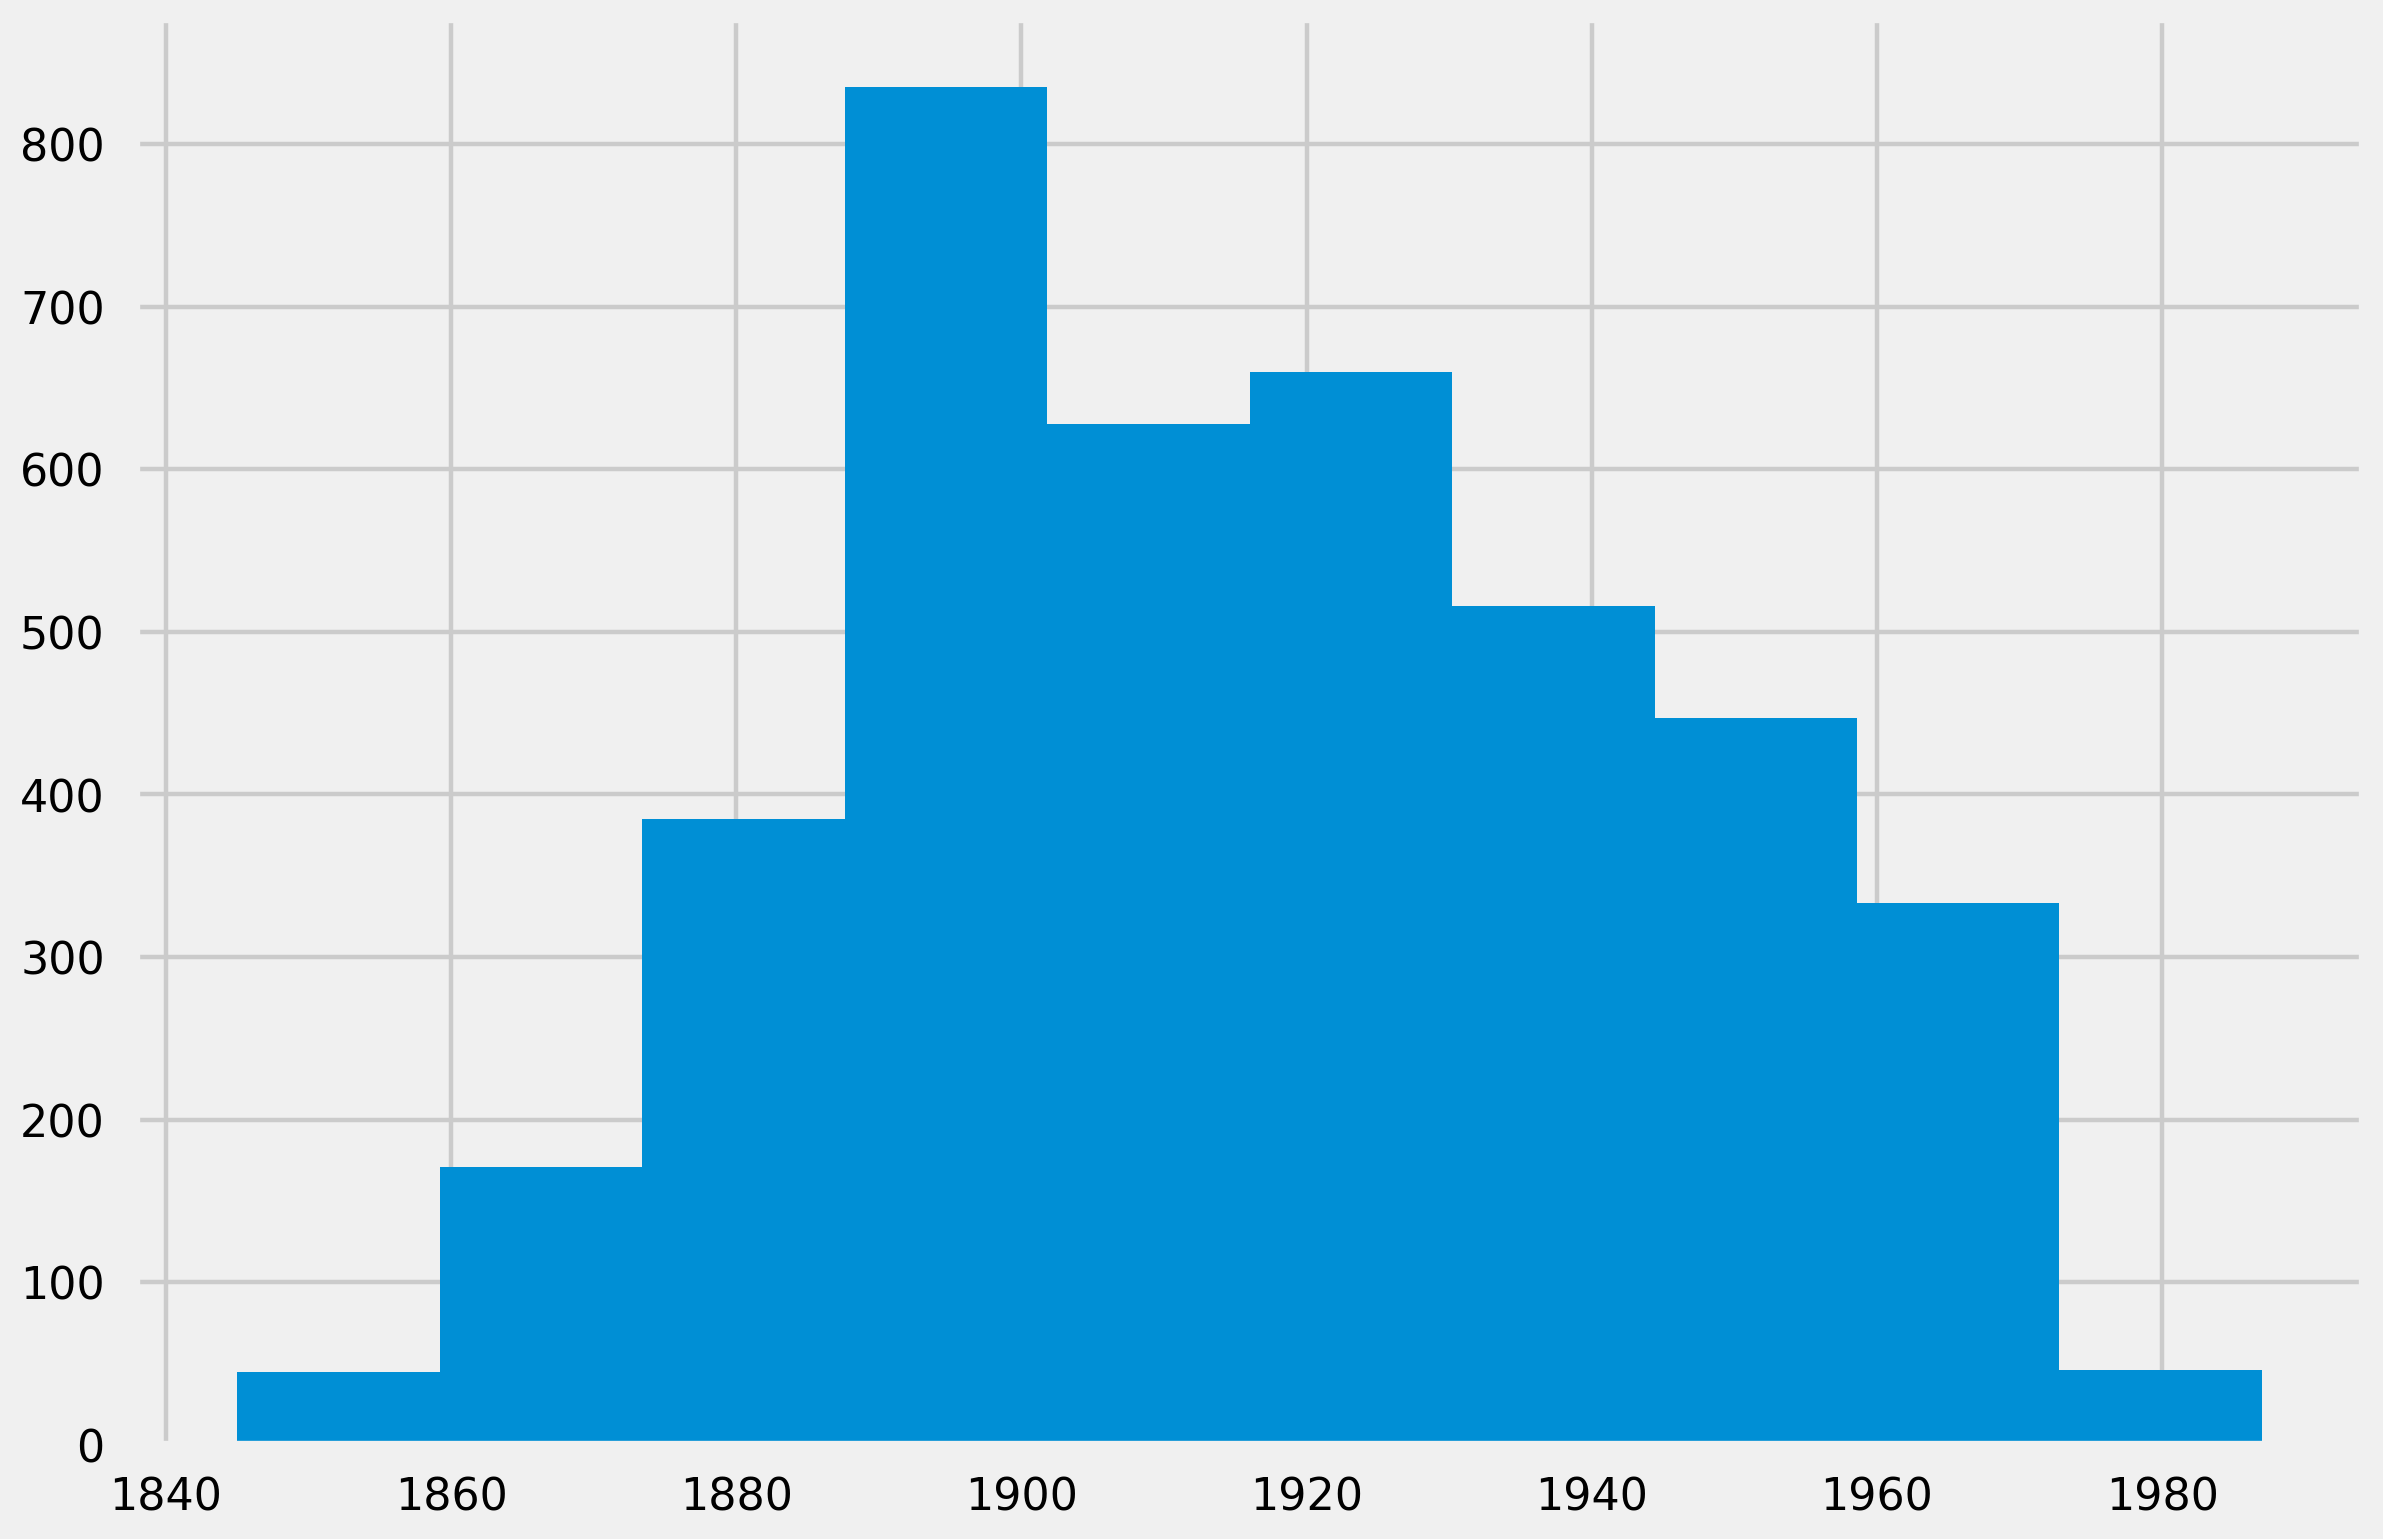

In [21]:
plt.hist(hofers['birthYear'])

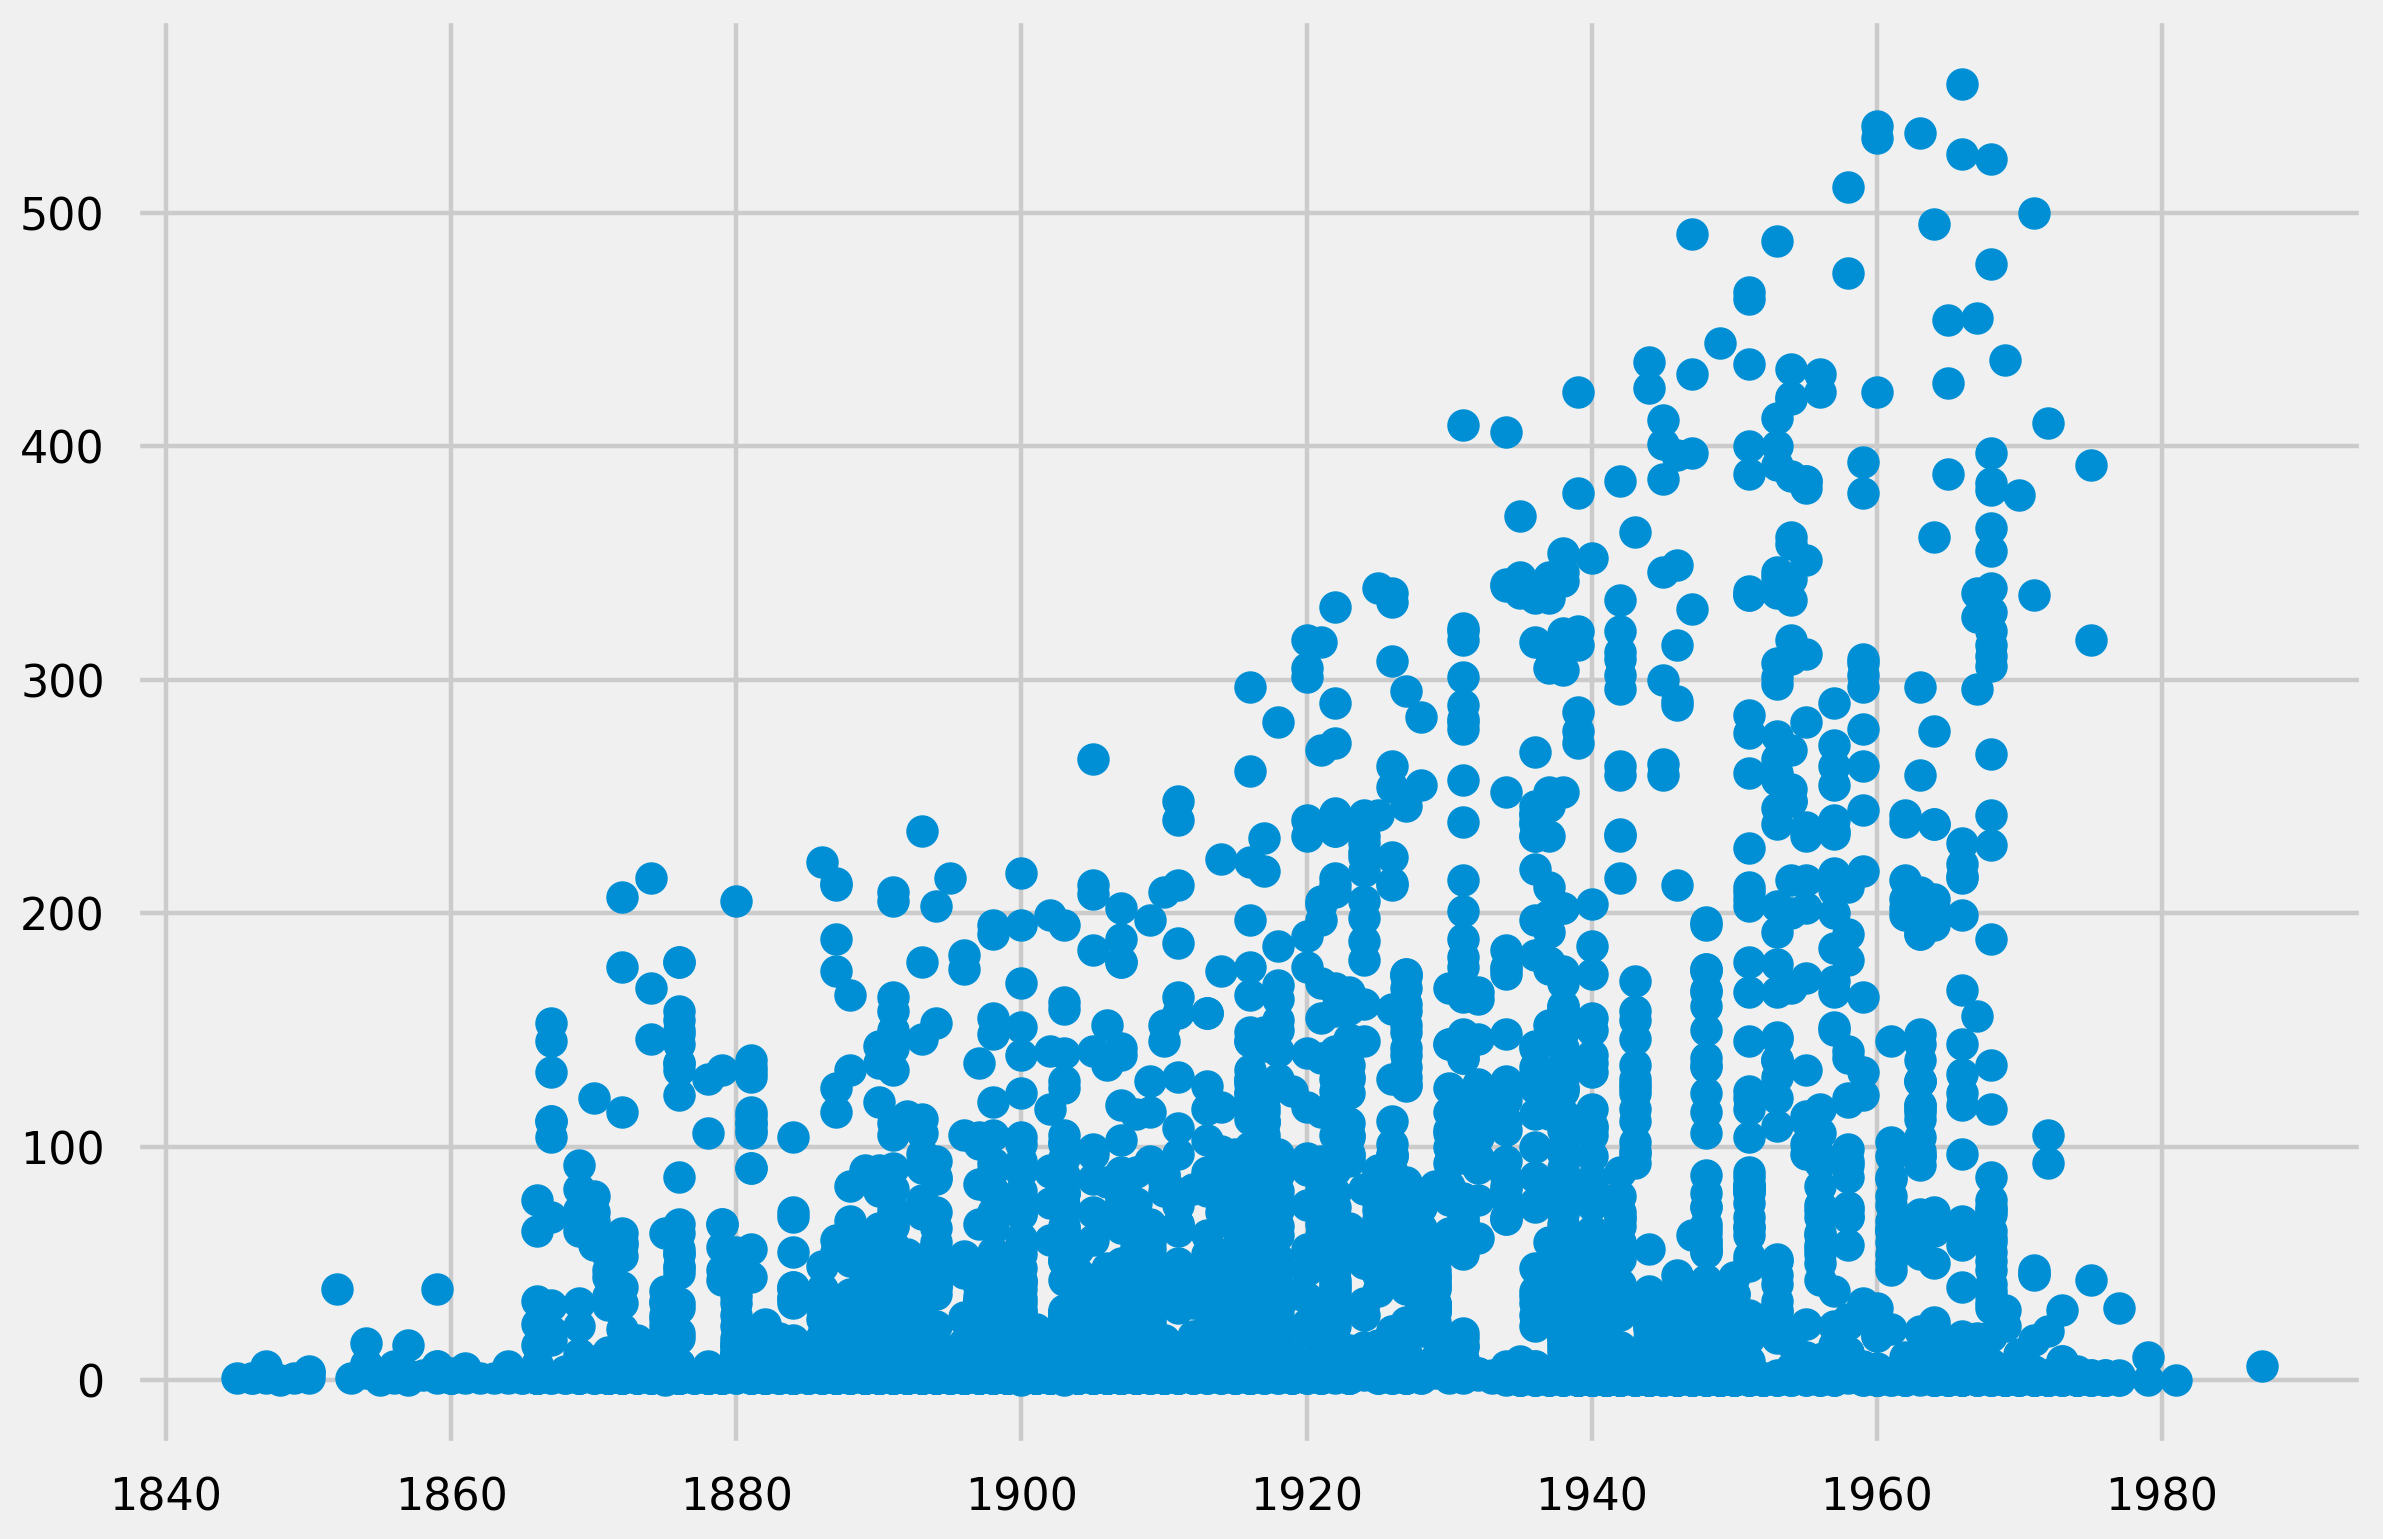

In [22]:
plt.scatter(hofers['birthYear'], hofers['votes'])

Looks like HOFers are getting more votes than they used to, but that's probably because more people vote in every HOF class. Fortunately the dataset includes a `needed` column that tells us how many votes were needed for entry.

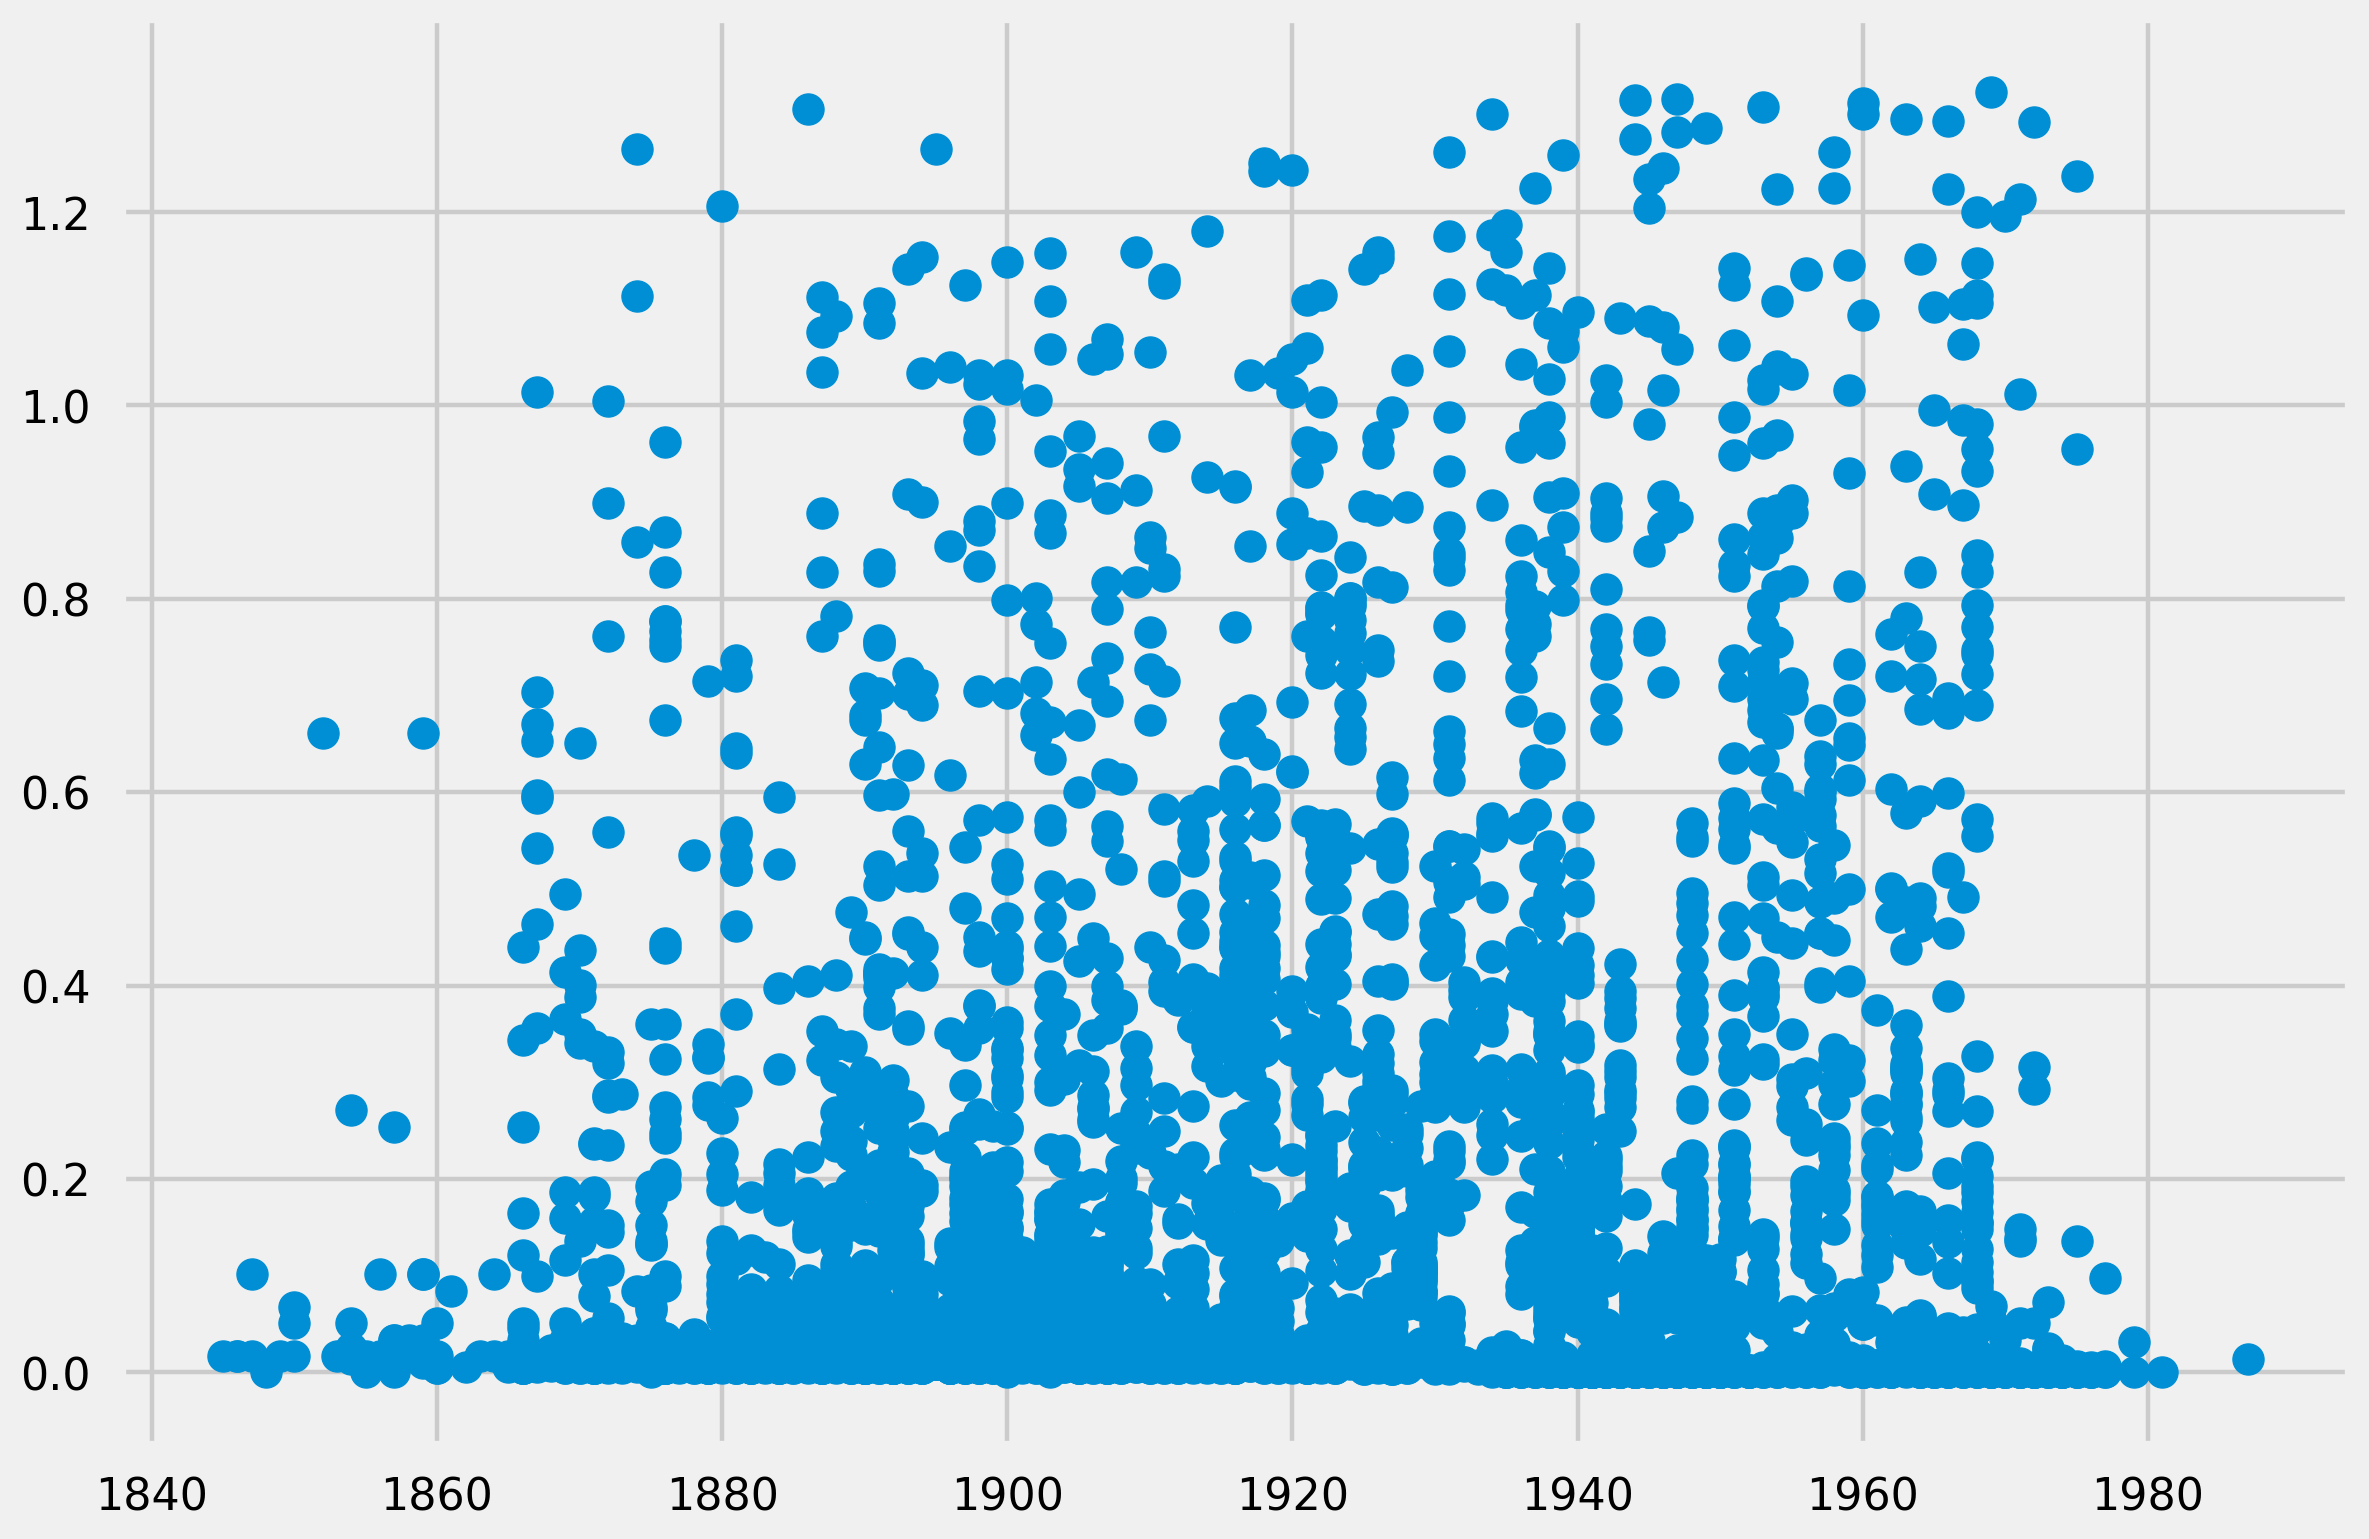

In [23]:
hofers['vote_share'] = hofers['votes'] / hofers['needed']
plt.scatter(hofers['birthYear'], hofers['vote_share'])

I want to look at Hall of Fame players by position, so I'll need to join in yet another table, the `Positions` table.

In [24]:
hofers = pd.merge(fielding, hof, on='playerID', how='inner')

In [25]:
# TODO - why did I lose some players who didn't have positions?
hofers.playerID.nunique()

1201

Hmm, we lost some players when we did this join (we used to have 1227). I'll need to go back and figure out why this is.

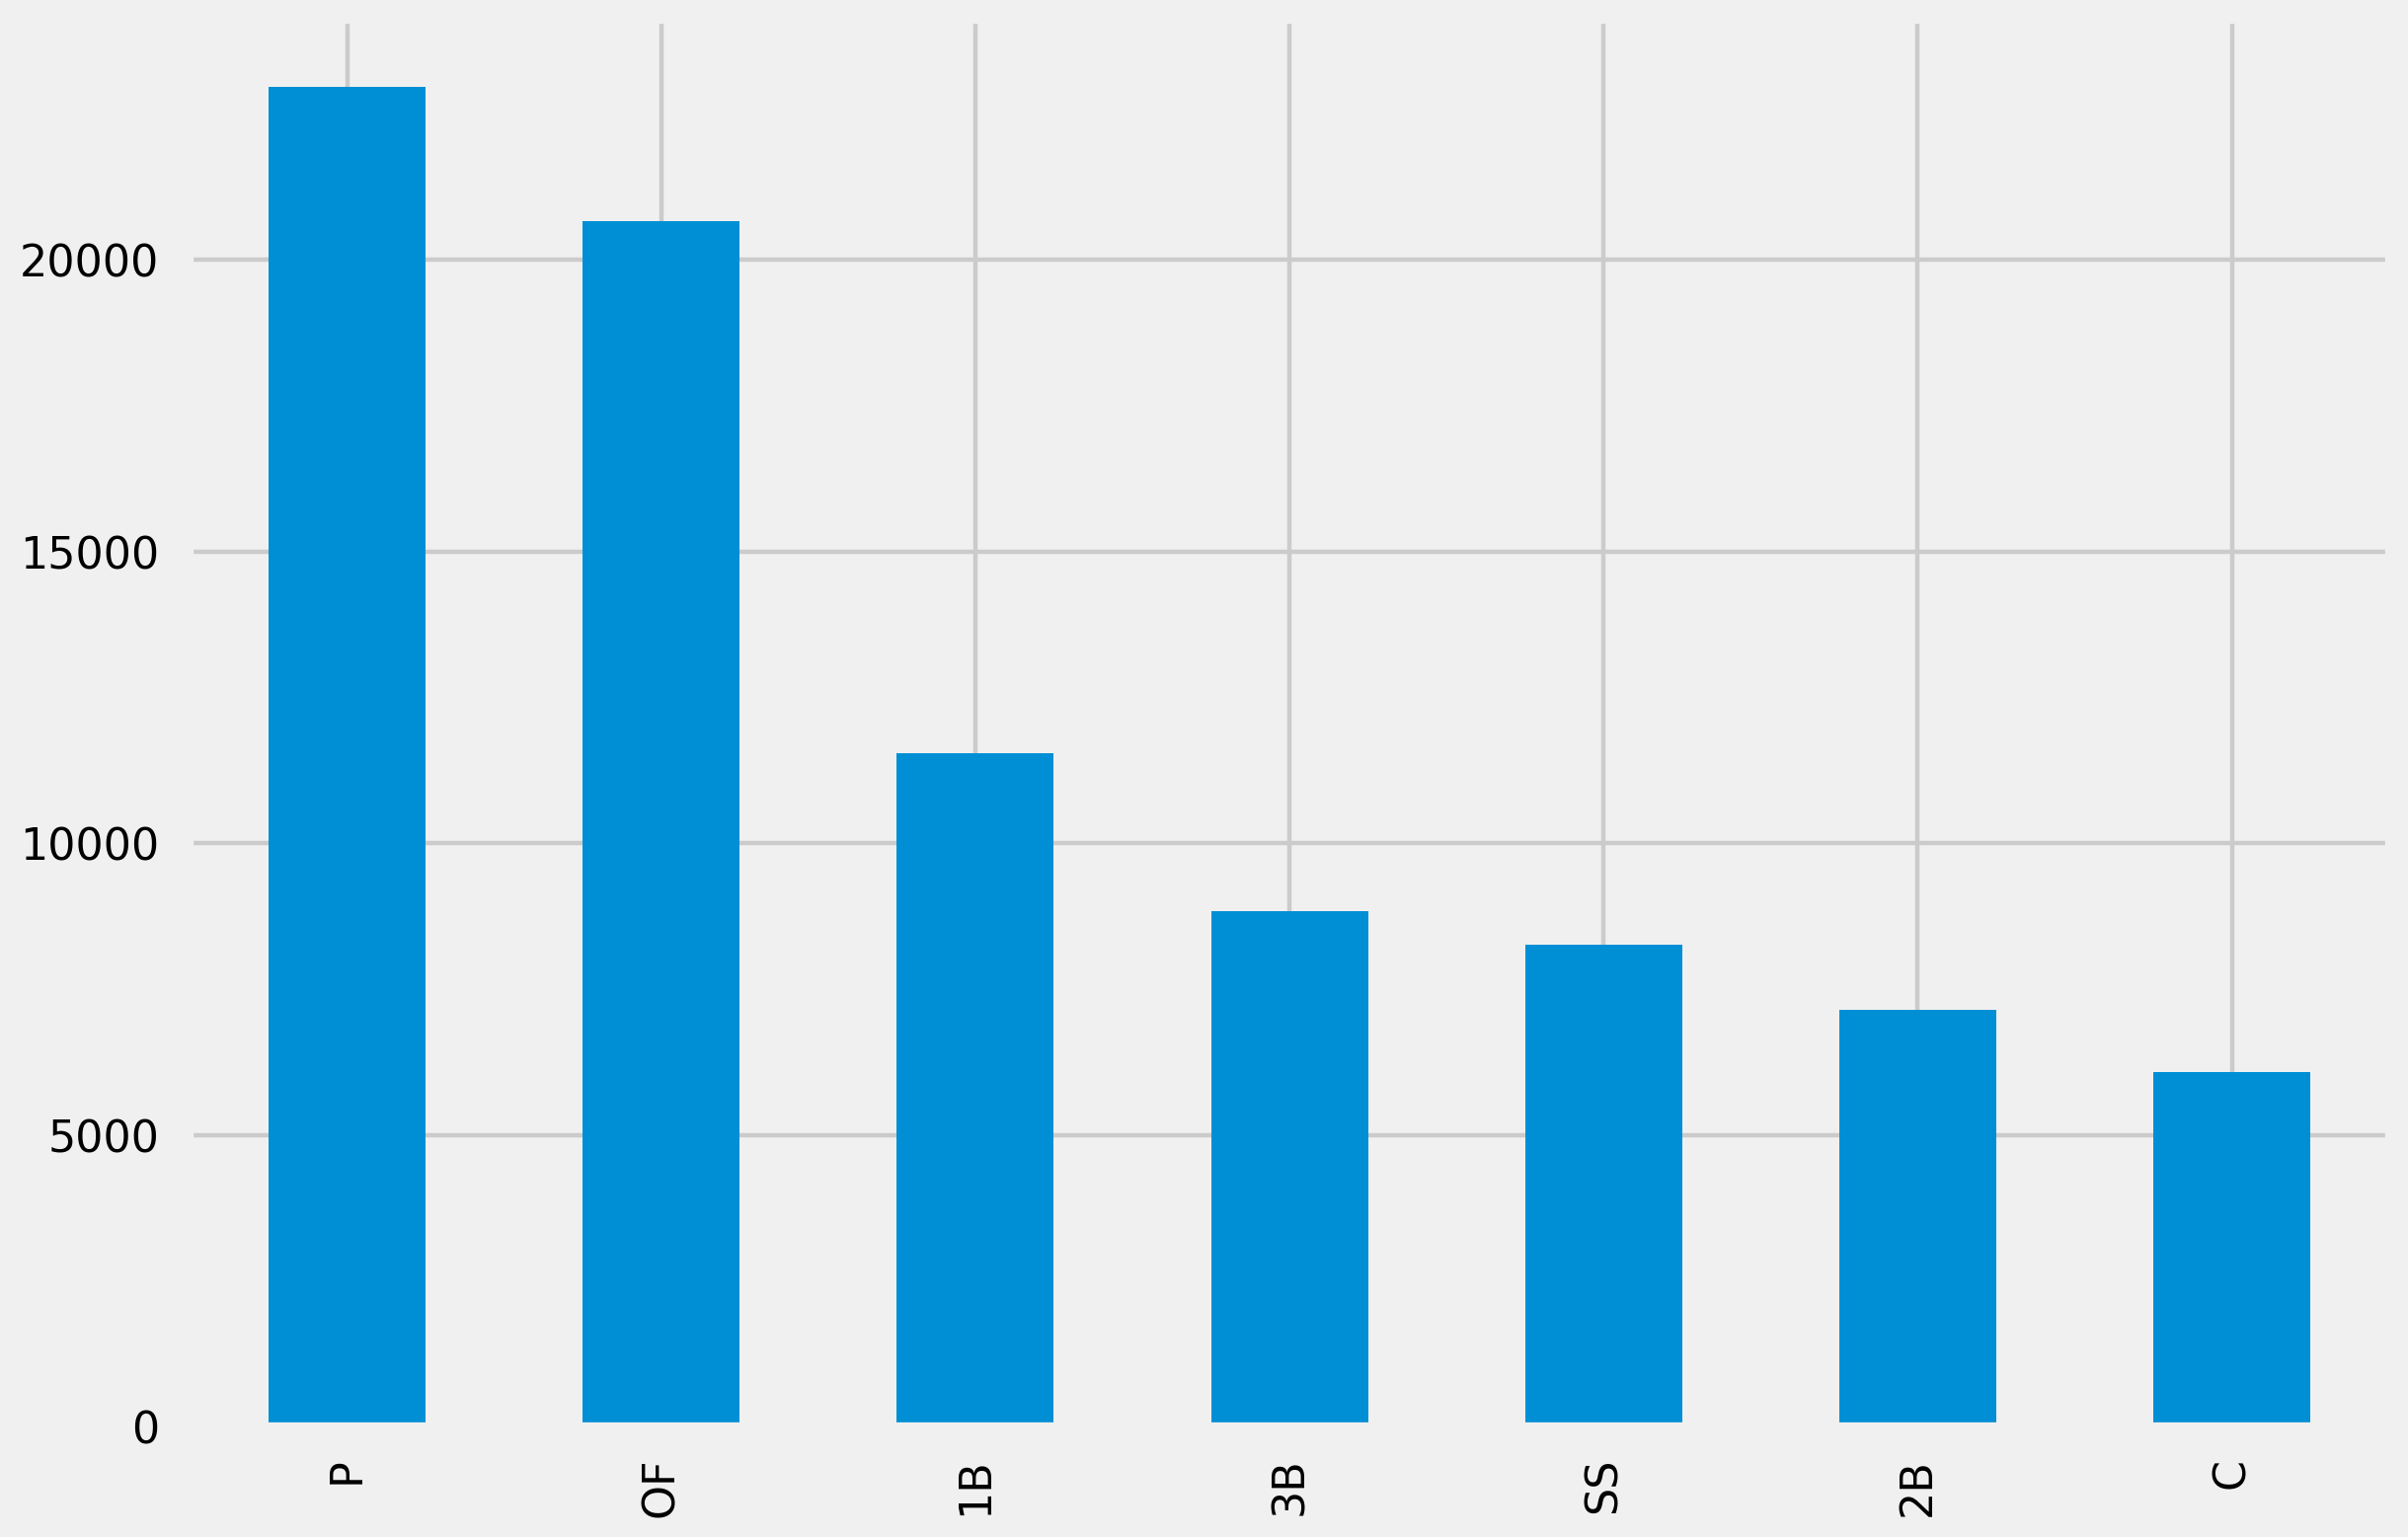

In [26]:
pd.value_counts(hofers['POS']).plot.bar()

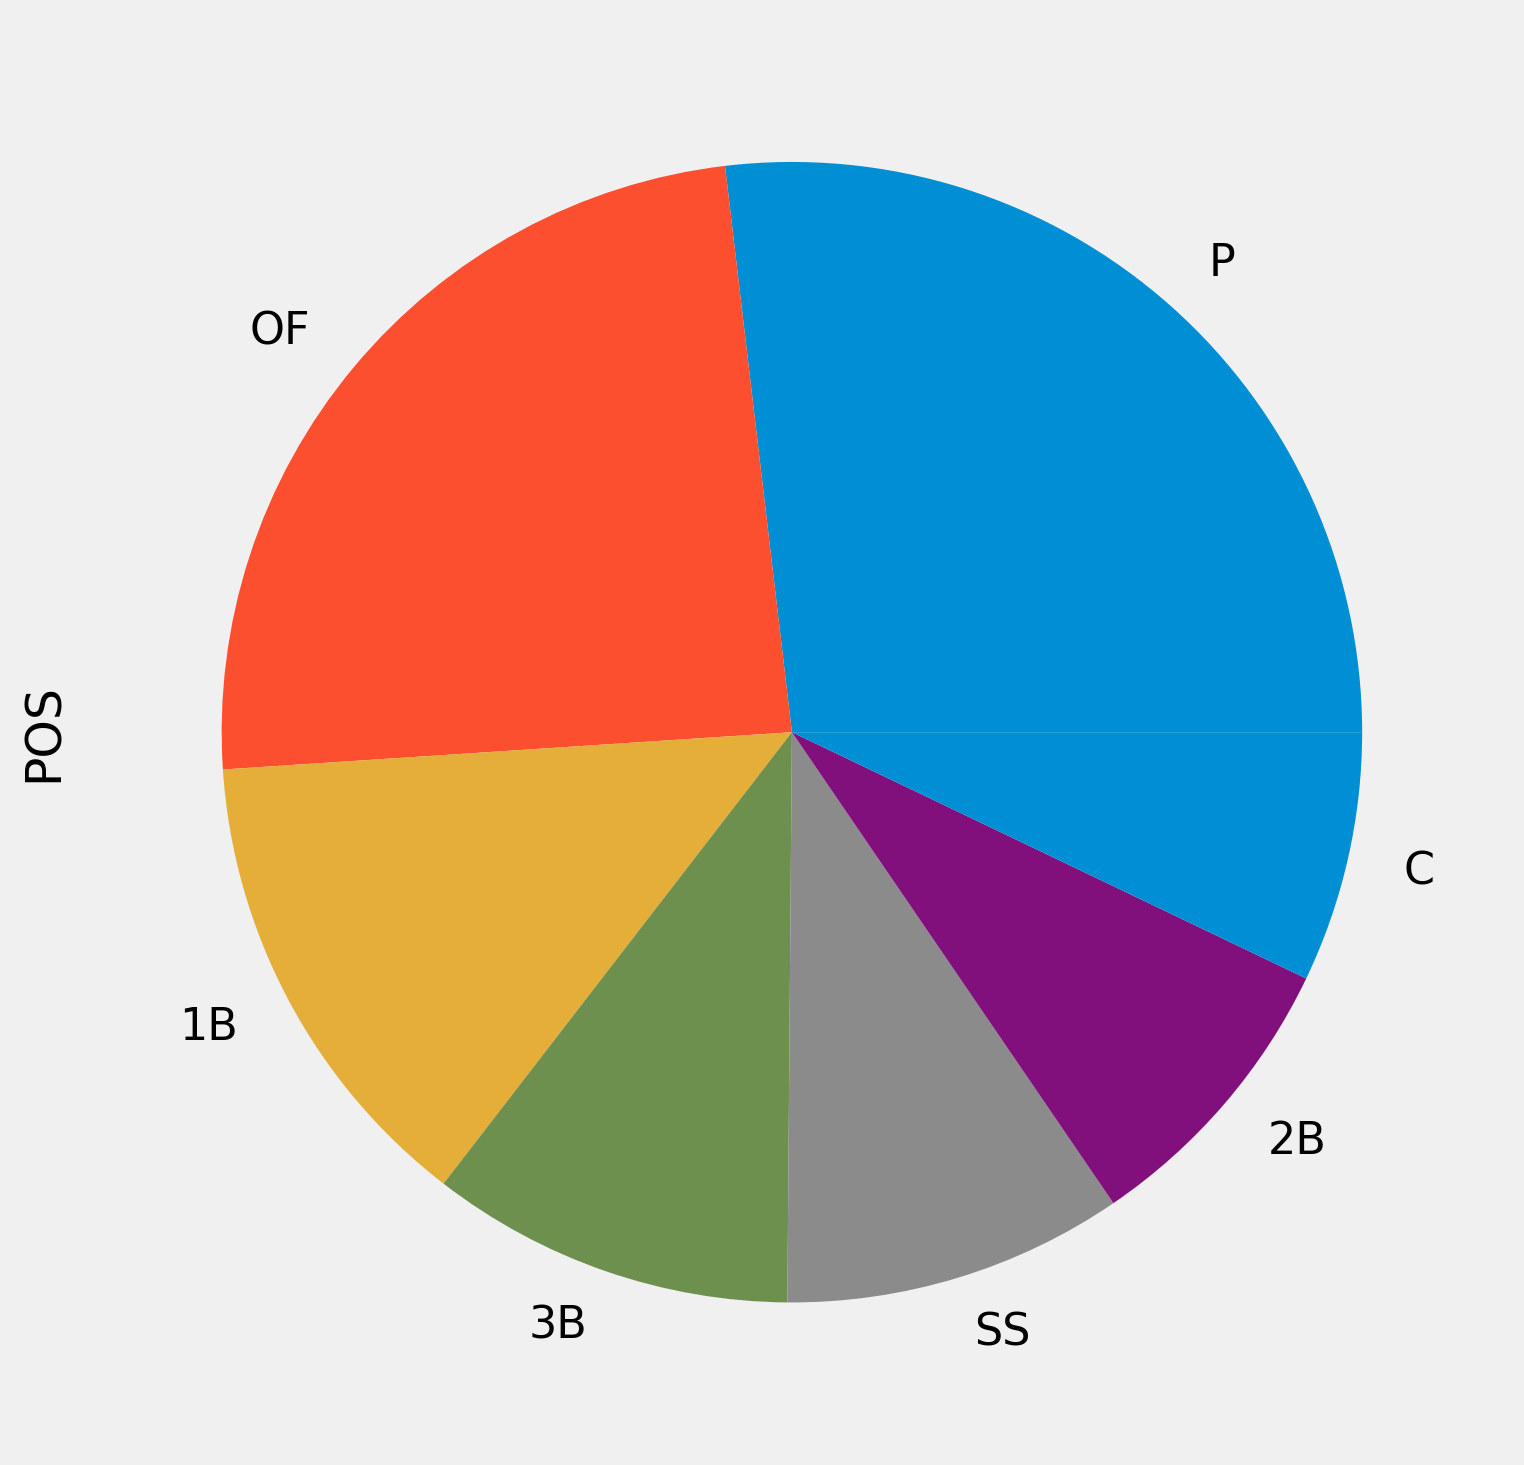

In [27]:
pd.value_counts(hofers['POS']).plot.pie()

Pitcher is the most popular position in the HOF, followed by OF. Catcher is the least popular.